In [1]:
# 1. Instalar y cargar Kaggle, descomprimir el dataset
!pip install -q kaggle
from google.colab import files

# Subir kaggle.json con tus credenciales
uploaded = files.upload()

# Crear el directorio .kaggle y mover kaggle.json
!mkdir -p ~/.kaggle
!cp "{list(uploaded.keys())[0]}" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

# Descargar y descomprimir el Sports Image Classification dataset
!kaggle datasets download -d jakeshbohaju/brain-tumor

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/jakeshbohaju/brain-tumor
License(s): CC-BY-NC-SA-4.0
 43% 6.00M/14.0M [00:00<00:00, 62.4MB/s]
100% 14.0M/14.0M [00:00<00:00, 113MB/s] 


In [2]:
!unzip brain-tumor.zip -d ./brain

Archive:  brain-tumor.zip
  inflating: ./brain/Brain Tumor.csv  
  inflating: ./brain/Brain Tumor/Brain Tumor/Image1.jpg  
  inflating: ./brain/Brain Tumor/Brain Tumor/Image10.jpg  
  inflating: ./brain/Brain Tumor/Brain Tumor/Image100.jpg  
  inflating: ./brain/Brain Tumor/Brain Tumor/Image1000.jpg  
  inflating: ./brain/Brain Tumor/Brain Tumor/Image1001.jpg  
  inflating: ./brain/Brain Tumor/Brain Tumor/Image1002.jpg  
  inflating: ./brain/Brain Tumor/Brain Tumor/Image1003.jpg  
  inflating: ./brain/Brain Tumor/Brain Tumor/Image1004.jpg  
  inflating: ./brain/Brain Tumor/Brain Tumor/Image1005.jpg  
  inflating: ./brain/Brain Tumor/Brain Tumor/Image1006.jpg  
  inflating: ./brain/Brain Tumor/Brain Tumor/Image1007.jpg  
  inflating: ./brain/Brain Tumor/Brain Tumor/Image1008.jpg  
  inflating: ./brain/Brain Tumor/Brain Tumor/Image1009.jpg  
  inflating: ./brain/Brain Tumor/Brain Tumor/Image101.jpg  
  inflating: ./brain/Brain Tumor/Brain Tumor/Image1010.jpg  
  inflating: ./brain/Brain 

Imagen: Image2149.jpg, Tamaño: 240x240
Imagen: Image2535.jpg, Tamaño: 240x240
Imagen: Image3136.jpg, Tamaño: 240x240
Imagen: Image2018.jpg, Tamaño: 240x240
Imagen: Image2302.jpg, Tamaño: 240x240


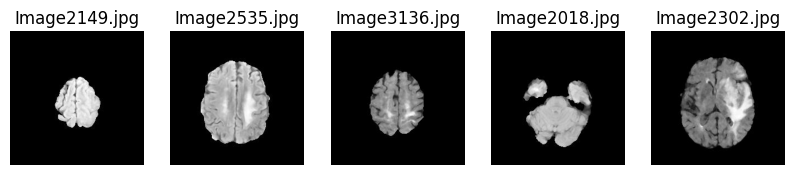

In [3]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Directorio de las imágenes
directorio = r'/content/brain/Brain Tumor/Brain Tumor'

# Obtener una lista de archivos de imagen
image_files = [f for f in os.listdir(directorio) if os.path.isfile(os.path.join(directorio, f))]

# Seleccionar 5 imágenes aleatorias
random_sample = random.sample(image_files, 5)

# Mostrar las imágenes y sus dimensiones
plt.figure(figsize=(10,5))
for i, image_file in enumerate(random_sample):
  img = Image.open(os.path.join(directorio, image_file))
  width, height = img.size
  print(f"Imagen: {image_file}, Tamaño: {width}x{height}")
  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.axis('off')
  plt.title(image_file)
plt.show()


In [4]:
# Tamaño de la carpeta de elementos
import os

directorio = "/content/brain/Brain Tumor/Brain Tumor"
count = 0
for path in os.listdir(directorio):
    if os.path.isfile(os.path.join(directorio, path)):
        count += 1
print('Número de elementos:', count)

Número de elementos: 3762


In [5]:
# Análisis rápido de las etiquetas
import pandas as pd

labels_df_1 = pd.read_csv("/content/brain/Brain Tumor.csv")

labels_df_1.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [6]:
# Análisis rápido de las etiquetas
import pandas as pd

labels_df_2 = pd.read_csv("/content/brain/bt_dataset_t3.csv")

labels_df_2.head()

,Image,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,PSNR,SSIM,MSE,DC,Target
0,Image1,23.448517,2538.985627,50.388348,0.651174,1.984202,5.421042,181.467713,0.781557,0.610831,0.847033,2.765411,0.968576,7.458341e-155,97.974630,0.777011,0.171163,0.303989,1
1,Image2,4.398331,834.853030,28.893823,0.953532,6.495203,43.349355,76.745886,0.972770,0.946281,0.980762,0.548605,0.959751,7.458341e-155,110.346597,0.977953,0.009913,0.839019,1
2,Image3,3.244263,642.059166,25.338886,0.966065,7.772860,61.756034,81.752406,0.980161,0.960715,0.985066,0.540411,0.944259,7.458341e-155,112.266298,0.985362,0.006372,0.849775,1
3,Image4,8.511353,1126.214187,33.559115,0.868765,3.763142,15.107579,362.291213,0.921786,0.849690,0.949295,2.765725,0.859027,7.458341e-155,101.955792,0.881015,0.068437,0.000000,0
4,Image5,21.000793,2235.316978,47.279139,0.684724,1.936029,4.722343,312.439226,0.804184,0.646711,0.880301,3.006660,0.938572,7.458341e-155,97.639870,0.766308,0.184878,0.000000,0


In [7]:
print(labels_df_1.shape)
print(labels_df_2.shape)

(3762, 15)
(1644, 19)


In [8]:
from sklearn.model_selection import train_test_split
import shutil
import os

import pandas as pd

# Cargar el CSV
labels_df_1 = pd.read_csv("/content/brain/Brain Tumor.csv")

# Asegurarse de que el ID esté correctamente formateado  para coincidir con el nombre de los archivos
images = labels_df_1['Image'].values
labels = labels_df_1['Class'].values

# Dividir en entrenamiento y validación
train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size = 0.2, stratify = labels, random_state=42)

# Crear las carpetas
train_path = '/content/brain/train'
val_path = '/content/brain/val'

# Crear las carpetas de las clases dentro de train y val
for label in labels_df_1['Class'].unique():
    os.makedirs(os.path.join(train_path, str(label)), exist_ok=True)
    os.makedirs(os.path.join(val_path, str(label)), exist_ok=True)

train_count = 0
val_count = 0

In [9]:

# Mover las imágenes de entrenamiento
for img, label in zip(train_images, train_labels):
    # Añadir la extensión de archivo '.jpg'
    img_with_extension = img + ".jpg"  # Cambia '.jpg' si las imágenes tienen otra extensión
    img_src = f'/content/brain/Brain Tumor/Brain Tumor/{img_with_extension}'  # Ruta con extensión
    img_dst = os.path.join(train_path, str(label), img_with_extension)  # Mover al directorio de entrenamiento


    if os.path.exists(img_src):  # Verificar si la imagen existe
        shutil.move(img_src, img_dst)
        train_count += 1
        print(f'Imagen movida: {img_src} -> {img_dst}')
    else:
        print(f'Imagen no encontrada: {img_src}')

print(f'Número de imágenes movidas a entrenamiento: {train_count}')

# Mover las imágenes de validación
for img, label in zip(val_images, val_labels):
    # Añadir la extensión de archivo '.jpg'
    img_with_extension = img + ".jpg"  # Cambia '.jpg' si las imágenes tienen otra extensión
    img_src = f'/content/brain/Brain Tumor/Brain Tumor/{img_with_extension}'  # Ruta con extensión
    img_dst = os.path.join(val_path, str(label), img_with_extension)  # Mover al directorio de validación


    if os.path.exists(img_src):  # Verificar si la imagen existe
        shutil.move(img_src, img_dst)
        val_count += 1
        print(f'Imagen movida: {img_src} -> {img_dst}')
    else:
        print(f'Imagen no encontrada: {img_src}')

print(f'Número de imágenes movidas a validación: {val_count}')


Se han truncado las últimas 5000 líneas del flujo de salida.
Intentando mover: /content/brain/Brain Tumor/Brain Tumor/Image3135.jpg a /content/brain/train/1/Image3135.jpg
Imagen movida: /content/brain/Brain Tumor/Brain Tumor/Image3135.jpg -> /content/brain/train/1/Image3135.jpg
Intentando mover: /content/brain/Brain Tumor/Brain Tumor/Image240.jpg a /content/brain/train/0/Image240.jpg
Imagen movida: /content/brain/Brain Tumor/Brain Tumor/Image240.jpg -> /content/brain/train/0/Image240.jpg
Intentando mover: /content/brain/Brain Tumor/Brain Tumor/Image340.jpg a /content/brain/train/1/Image340.jpg
Imagen movida: /content/brain/Brain Tumor/Brain Tumor/Image340.jpg -> /content/brain/train/1/Image340.jpg
Intentando mover: /content/brain/Brain Tumor/Brain Tumor/Image180.jpg a /content/brain/train/0/Image180.jpg
Imagen movida: /content/brain/Brain Tumor/Brain Tumor/Image180.jpg -> /content/brain/train/0/Image180.jpg
Intentando mover: /content/brain/Brain Tumor/Brain Tumor/Image87.jpg a /content

In [17]:
# Verficar el tamaño de las carpetas 0 y 1 train y val
import os

# ruta de la carpeta
dir_path = r'/content/brain/train/0'
count = 0
# Itera dentro de la carpeta, es un contador
for path in os.listdir(dir_path):
    # verifica si la ruta actual es un arhico
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('Número total de elementos:', count)

Número total de elementos: 1663


In [18]:
# Verficar el tamaño de las carpetas 0 y 1 train y val
import os

# ruta de la carpeta
dir_path = r'/content/brain/train/1'
count = 0
# Itera dentro de la carpeta, es un contador
for path in os.listdir(dir_path):
    # verifica si la ruta actual es un arhico
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('Número total de elementos:', count)

Número total de elementos: 1346


In [19]:
# Verficar el tamaño de las carpetas 0 y 1 train y val
import os

# ruta de la carpeta
dir_path = r'/content/brain/val/0'
count = 0
# Itera dentro de la carpeta, es un contador
for path in os.listdir(dir_path):
    # verifica si la ruta actual es un arhico
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('Número total de elementos:', count)

Número total de elementos: 416


In [20]:
# Verficar el tamaño de las carpetas 0 y 1 train y val
import os

# ruta de la carpeta
dir_path = r'/content/brain/val/1'
count = 0
# Itera dentro de la carpeta, es un contador
for path in os.listdir(dir_path):
    # verifica si la ruta actual es un arhico
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('Número total de elementos:', count)

Número total de elementos: 337


In [21]:
# Entrenar el modelo
!pip install ultralytics
from ultralytics import YOLO

# Cargar el modelo YOLOv8n para clasificación
model = YOLO('yolov8s-cls.pt')
# Entrenar el modelo con CIFAR-10
model.train(data='/content/brain', epochs=20, imgsz=64)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.8/882.8 kB 16.7 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 12.3M/12.3M [00:00<00:00, 102MB/s] 


Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=classify, mode=train, model=yolov8s-cls.pt, data=/content/brain, epochs=20, time=None, patience=100, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line

train: Scanning /content/brain/train... 3009 images, 0 corrupt: 100%|██████████| 3009/3009 [00:01<00:00, 1874.00it/s]

train: New cache created: /content/brain/train.cache



val: Scanning /content/brain/val... 753 images, 0 corrupt: 100%|██████████| 753/753 [00:00<00:00, 2320.00it/s]

val: New cache created: /content/brain/val.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)


TensorBoard: model graph visualization added ✅
Image sizes 64 train, 64 val
Using 0 dataloader workers
Logging results to runs/classify/train
Starting training for 20 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/20         0G     0.8851         16         64:   1%|          | 1/189 [00:00<02:30,  1.25it/s]

       1/20         0G     0.8405         16         64:   1%|          | 2/189 [00:01<01:51,  1.68it/s]
100%|██████████| 755k/755k [00:00<00:00, 12.5MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:04<00:00,  5.45it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:04<00:00,  5.76it/s]

                   all      0.894          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:04<00:00,  5.85it/s]

                   all      0.904          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:04<00:00,  5.58it/s]

                   all       0.92          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:05<00:00,  4.40it/s]

                   all      0.927          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:04<00:00,  5.67it/s]

                   all      0.942          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:04<00:00,  5.91it/s]

                   all      0.954          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:04<00:00,  5.20it/s]

                   all      0.961          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:05<00:00,  4.51it/s]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


      10/20         0G     0.2131          1         64: 100%|██████████| 189/189 [01:02<00:00,  3.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:04<00:00,  4.90it/s]

                   all      0.956          1



      Epoch    GPU_mem       loss  Instances       Size


      11/20         0G      0.212          1         64: 100%|██████████| 189/189 [01:19<00:00,  2.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:06<00:00,  3.84it/s]

                   all      0.968          1



      Epoch    GPU_mem       loss  Instances       Size


      12/20         0G     0.2077          1         64: 100%|██████████| 189/189 [01:09<00:00,  2.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:05<00:00,  4.22it/s]

                   all      0.967          1



      Epoch    GPU_mem       loss  Instances       Size


      13/20         0G     0.2026          1         64: 100%|██████████| 189/189 [01:15<00:00,  2.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:06<00:00,  3.66it/s]

                   all      0.964          1



      Epoch    GPU_mem       loss  Instances       Size


      14/20         0G     0.1865          1         64: 100%|██████████| 189/189 [01:15<00:00,  2.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:04<00:00,  4.84it/s]

                   all      0.969          1



      Epoch    GPU_mem       loss  Instances       Size


      15/20         0G     0.1813          1         64: 100%|██████████| 189/189 [01:01<00:00,  3.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:04<00:00,  5.94it/s]

                   all      0.954          1



      Epoch    GPU_mem       loss  Instances       Size


      16/20         0G     0.1942          1         64: 100%|██████████| 189/189 [01:01<00:00,  3.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:04<00:00,  5.53it/s]

                   all      0.969          1



      Epoch    GPU_mem       loss  Instances       Size


      17/20         0G      0.168          1         64: 100%|██████████| 189/189 [01:01<00:00,  3.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:05<00:00,  4.36it/s]

                   all      0.971          1



      Epoch    GPU_mem       loss  Instances       Size


      18/20         0G     0.1582          1         64: 100%|██████████| 189/189 [01:00<00:00,  3.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:04<00:00,  5.92it/s]

                   all      0.973          1



      Epoch    GPU_mem       loss  Instances       Size


      19/20         0G     0.1611          1         64: 100%|██████████| 189/189 [01:00<00:00,  3.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:04<00:00,  5.95it/s]

                   all      0.971          1



      Epoch    GPU_mem       loss  Instances       Size


      20/20         0G     0.1651          1         64: 100%|██████████| 189/189 [01:01<00:00,  3.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:07<00:00,  3.25it/s]

                   all      0.971          1



20 epochs completed in 0.391 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 10.3MB
Optimizer stripped from runs/classify/train/weights/best.pt, 10.3MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8s-cls summary (fused): 73 layers, 5,077,762 parameters, 0 gradients, 12.4 GFLOPs
train: /content/brain/train... found 3009 images in 2 classes ✅ 
val: /content/brain/val... found 753 images in 2 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:04<00:00,  5.87it/s]


                   all      0.973          1
Speed: 0.0ms preprocess, 3.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c5729cb74c0>
curves: []
curves_results: []
fitness: 0.9867197871208191
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9734395742416382, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9867197871208191}
save_dir: PosixPath('runs/classify/train')
speed: {'preprocess': 0.0006813768688267763, 'inference': 3.7742082182946275, 'loss': 0.00011651797756889111, 'postprocess': 6.712448707773075e-05}
task: 'classify'
top1: 0.9734395742416382
top5: 1.0

In [22]:
# Visualizar los gráficos
import os
import matplotlib.pyplot as plt
from PIL import Image

# Ruta de acceso de las imágenes

# Ruta de acceso de las imágenes
directorio = "/content/runs/classify/train"

# Listar todos los archivos en el directorio
files = os.listdir(directorio)
print("Estos son los archivos de resultado de entrenamiento", files)

Estos son los archivos de resultado de entrenamiento ['val_batch2_pred.jpg', 'results.png', 'val_batch0_pred.jpg', 'train_batch1890.jpg', 'confusion_matrix.png', 'results.csv', 'train_batch1892.jpg', 'events.out.tfevents.1728143893.b7586504ef58.400.0', 'val_batch1_labels.jpg', 'val_batch1_pred.jpg', 'train_batch1891.jpg', 'val_batch0_labels.jpg', 'weights', 'train_batch1.jpg', 'train_batch2.jpg', 'confusion_matrix_normalized.png', 'val_batch2_labels.jpg', 'train_batch0.jpg', 'args.yaml']


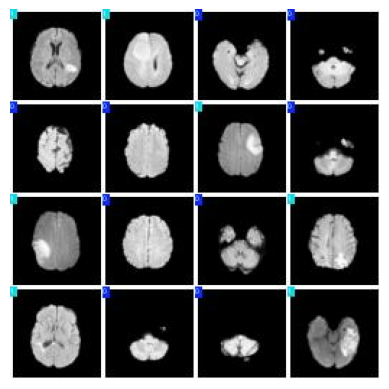

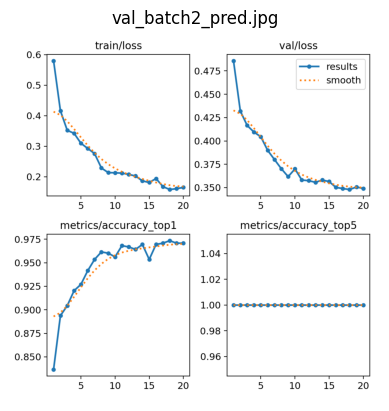

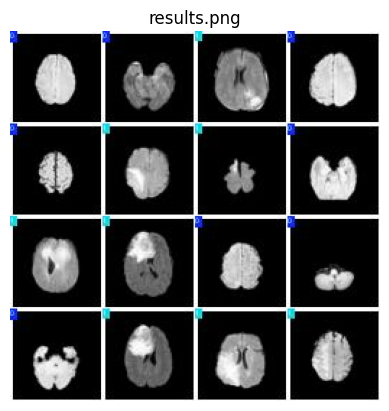

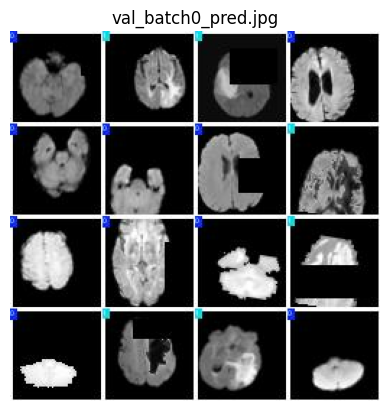

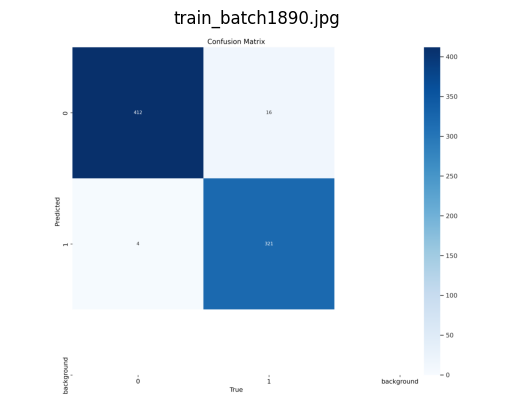

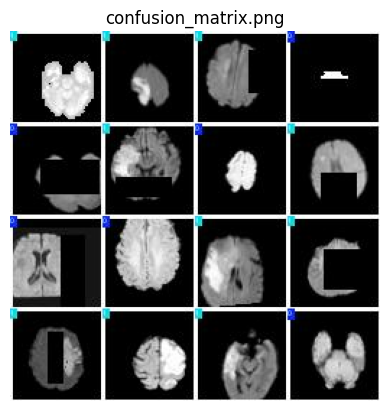

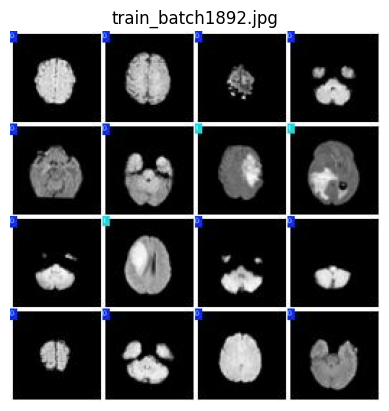

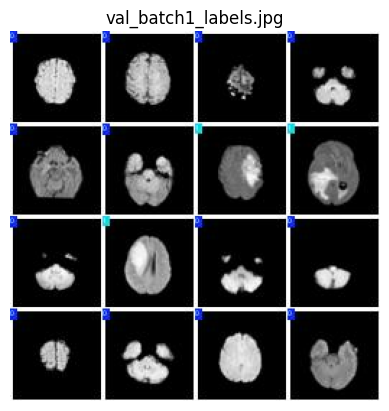

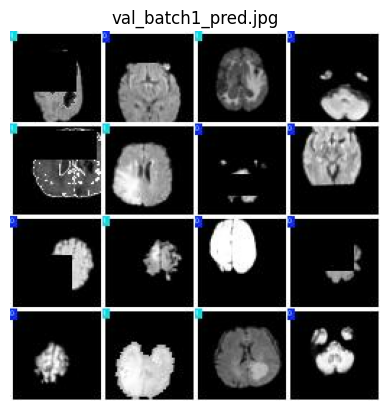

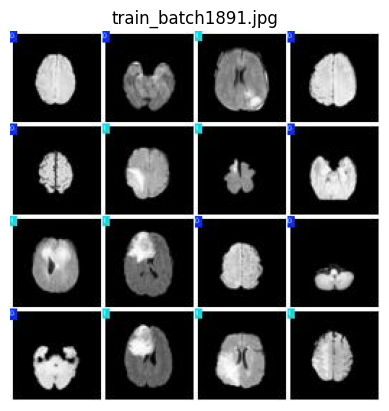

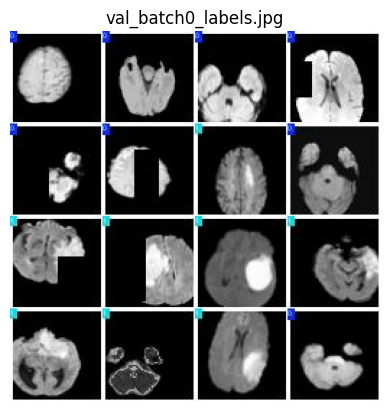

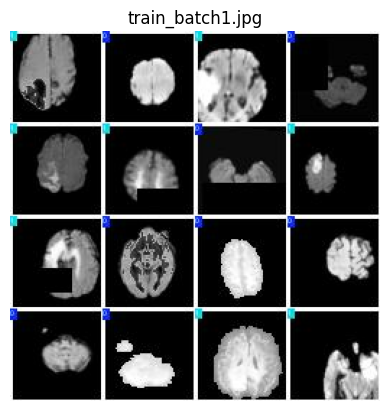

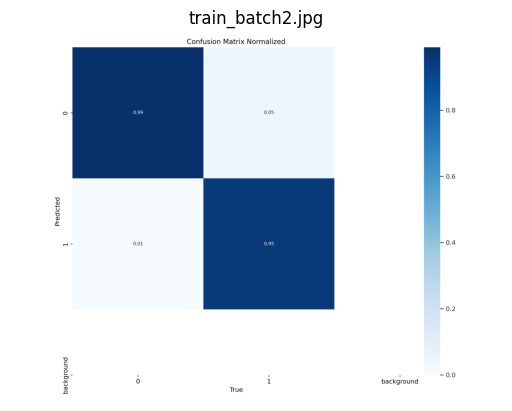

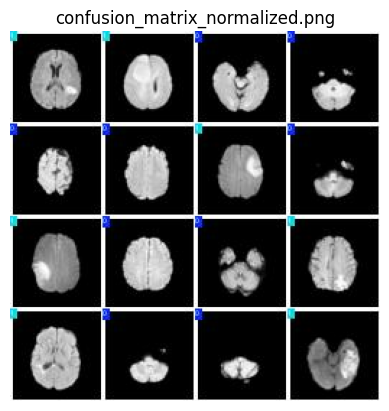

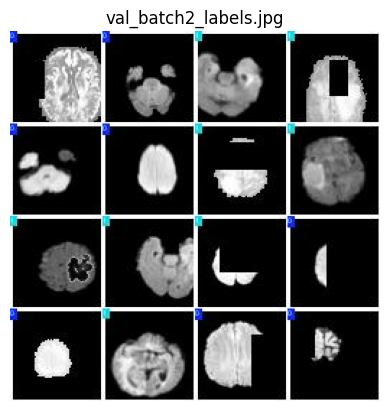

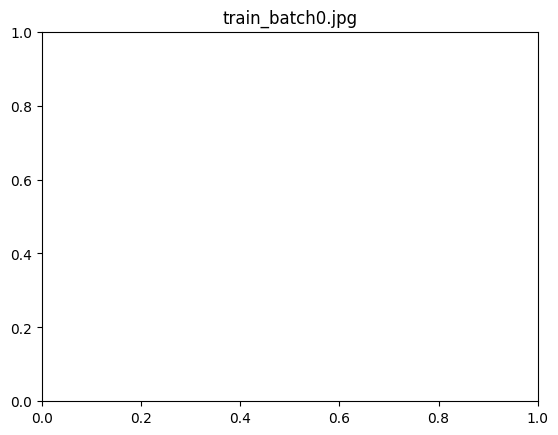

In [23]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Ruta de acceso donde se encuentran los archivos
directorio = "/content/runs/classify/train"

# Filtrar los archivos que son solo imágenes
image_files = [file for file in files if file.endswith(('.png', '.jpg', '.jpeg'))]

# Mostrar las imágenes
for image_file in image_files:
    image_path = os.path.join(directorio, image_file)
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    plt.title(image_file)
plt.show()


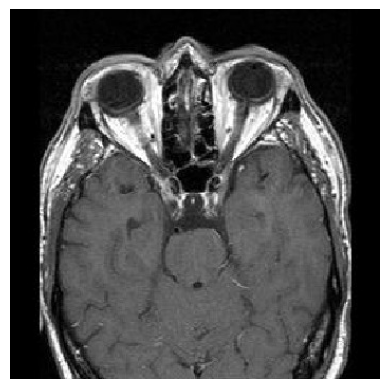


0: 64x64 1 0.99, 0 0.01, 23.3ms
Speed: 4.0ms preprocess, 23.3ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)
Results saved to runs/classify/train10


In [36]:
# Inferencias
import os
from PIL import Image

directorio = "/content/no_tumor (1).jpg"
imagen = Image.open(directorio)
plt.imshow(imagen)
plt.axis('off')
plt.show()

# Realizar la predicción del modelo YOLO
results = model.predict(imagen, conf=0.25, save=True)

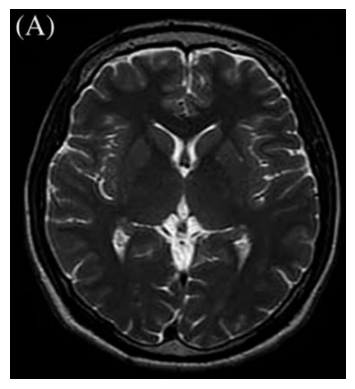


0: 64x64 0 0.91, 1 0.09, 63.0ms
Speed: 15.3ms preprocess, 63.0ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)
Results saved to runs/classify/train11


In [37]:
# Inferencias
import os
from PIL import Image

directorio = "/content/no_tumor (3).jpg"
imagen = Image.open(directorio)
plt.imshow(imagen)
plt.axis('off')
plt.show()

# Realizar la predicción del modelo YOLO
results = model.predict(imagen, conf=0.25, save=True)

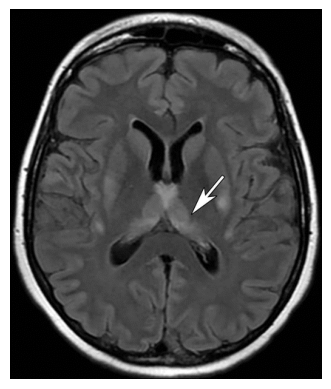


0: 64x64 1 0.53, 0 0.47, 34.8ms
Speed: 5.8ms preprocess, 34.8ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)
Results saved to runs/classify/train12


In [38]:
# Inferencias
import os
from PIL import Image

directorio = "/content/no_tumor (4).jpg"
imagen = Image.open(directorio)
plt.imshow(imagen)
plt.axis('off')
plt.show()

# Realizar la predicción del modelo YOLO
results = model.predict(imagen, conf=0.25, save=True)

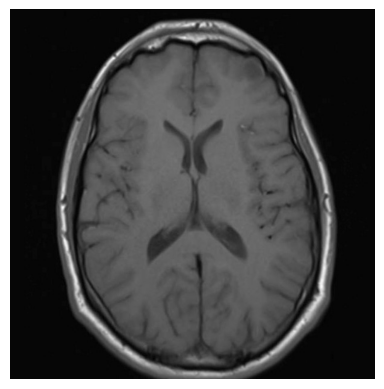


0: 64x64 1 0.66, 0 0.34, 29.9ms
Speed: 21.3ms preprocess, 29.9ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)
Results saved to runs/classify/train13


In [40]:
# Inferencias
import os
from PIL import Image

directorio = "/content/no_tumor (5).jpg"
imagen = Image.open(directorio)
plt.imshow(imagen)
plt.axis('off')
plt.show()

# Realizar la predicción del modelo YOLO
results = model.predict(imagen, conf=0.25, save=True)

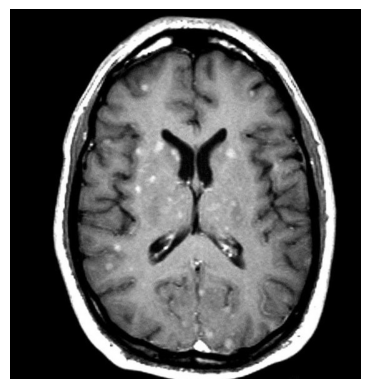


0: 64x64 0 0.67, 1 0.33, 29.0ms
Speed: 19.7ms preprocess, 29.0ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)
Results saved to runs/classify/train14


In [42]:
# Inferencias
import os
from PIL import Image

directorio = "/content/no_tumor (6).jpg"
imagen = Image.open(directorio)
plt.imshow(imagen)
plt.axis('off')
plt.show()

# Realizar la predicción del modelo YOLO
results = model.predict(imagen, conf=0.25, save=True)

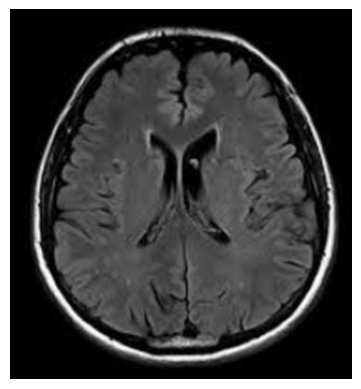


0: 64x64 0 0.84, 1 0.16, 41.0ms
Speed: 3.6ms preprocess, 41.0ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)
Results saved to runs/classify/train15


In [43]:
# Inferencias
import os
from PIL import Image

directorio = "/content/no_tumor (7).jpg"
imagen = Image.open(directorio)
plt.imshow(imagen)
plt.axis('off')
plt.show()

# Realizar la predicción del modelo YOLO
results = model.predict(imagen, conf=0.25, save=True)

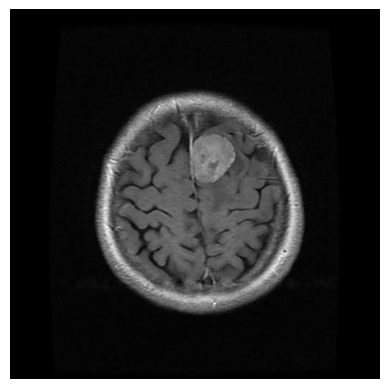


0: 64x64 0 0.94, 1 0.06, 22.4ms
Speed: 11.8ms preprocess, 22.4ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)
Results saved to runs/classify/train16


In [44]:
# Inferencias
import os
from PIL import Image

directorio = "/content/tumor (1).jpg"
imagen = Image.open(directorio)
plt.imshow(imagen)
plt.axis('off')
plt.show()

# Realizar la predicción del modelo YOLO
results = model.predict(imagen, conf=0.25, save=True)

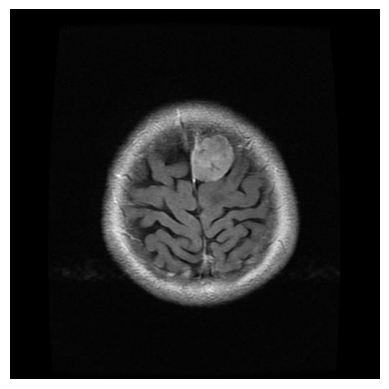


0: 64x64 0 0.75, 1 0.25, 20.2ms
Speed: 16.9ms preprocess, 20.2ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)
Results saved to runs/classify/train17


In [45]:
# Inferencias
import os
from PIL import Image

directorio = "/content/tumor (2).jpg"
imagen = Image.open(directorio)
plt.imshow(imagen)
plt.axis('off')
plt.show()

# Realizar la predicción del modelo YOLO
results = model.predict(imagen, conf=0.25, save=True)

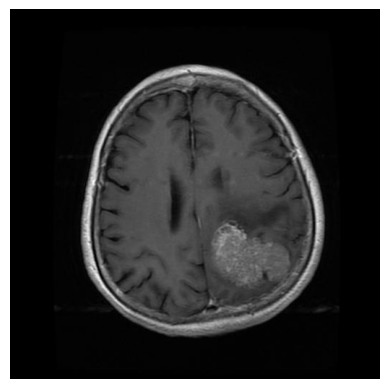


0: 64x64 1 0.92, 0 0.08, 44.4ms
Speed: 7.1ms preprocess, 44.4ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)
Results saved to runs/classify/train18


In [46]:
# Inferencias
import os
from PIL import Image

directorio = "/content/tumor (3).jpg"
imagen = Image.open(directorio)
plt.imshow(imagen)
plt.axis('off')
plt.show()

# Realizar la predicción del modelo YOLO
results = model.predict(imagen, conf=0.25, save=True)

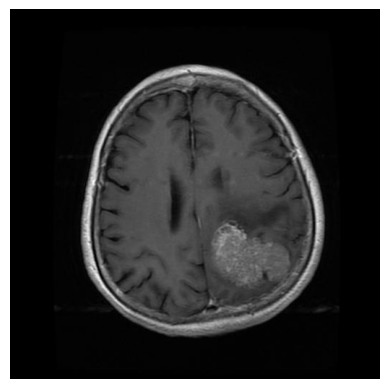


0: 64x64 1 0.92, 0 0.08, 12.6ms
Speed: 7.6ms preprocess, 12.6ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)
Results saved to runs/classify/train19


In [47]:
# Inferencias
import os
from PIL import Image

directorio = "/content/tumor (3).jpg"
imagen = Image.open(directorio)
plt.imshow(imagen)
plt.axis('off')
plt.show()

# Realizar la predicción del modelo YOLO
results = model.predict(imagen, conf=0.25, save=True)

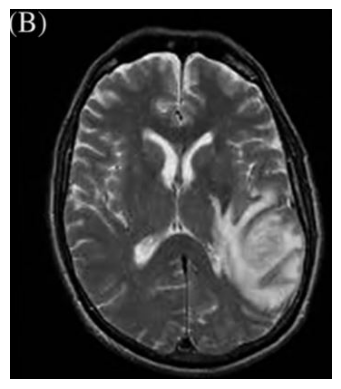


0: 64x64 0 0.52, 1 0.48, 29.9ms
Speed: 3.9ms preprocess, 29.9ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)
Results saved to runs/classify/train21


In [49]:
# Inferencias
import os
from PIL import Image

directorio = "/content/tumor (4).jpg"
imagen = Image.open(directorio)
plt.imshow(imagen)
plt.axis('off')
plt.show()

# Realizar la predicción del modelo YOLO
results = model.predict(imagen, conf=0.25, save=True)

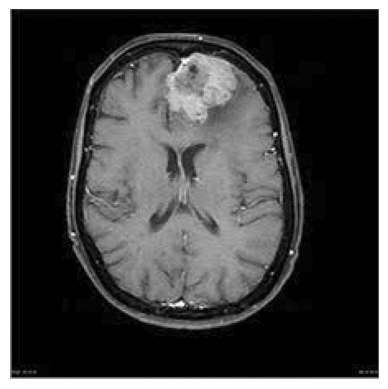


0: 64x64 0 0.73, 1 0.27, 15.0ms
Speed: 6.0ms preprocess, 15.0ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)
Results saved to runs/classify/train22


In [50]:
# Inferencias
import os
from PIL import Image

directorio = "/content/tumor (5).jpg"
imagen = Image.open(directorio)
plt.imshow(imagen)
plt.axis('off')
plt.show()

# Realizar la predicción del modelo YOLO
results = model.predict(imagen, conf=0.25, save=True)

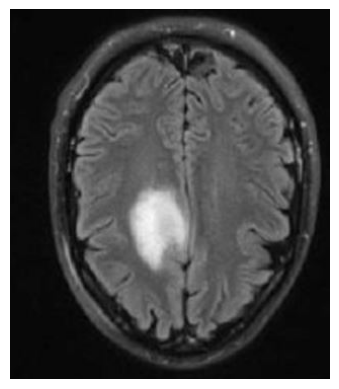


0: 64x64 1 1.00, 0 0.00, 28.4ms
Speed: 3.7ms preprocess, 28.4ms inference, 1.7ms postprocess per image at shape (1, 3, 64, 64)
Results saved to runs/classify/train23


In [51]:
# Inferencias
import os
from PIL import Image

directorio = "/content/tumor (6).jpg"
imagen = Image.open(directorio)
plt.imshow(imagen)
plt.axis('off')
plt.show()

# Realizar la predicción del modelo YOLO
results = model.predict(imagen, conf=0.25, save=True)